In [177]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [178]:
whale_returns_path = Path("../Pandas_Portfolio_HW/Resources/whale_returns.csv")
sp500_history_path = Path("../Pandas_Portfolio_HW/Resources/sp500_history.csv")
goog_history_path = Path("../Pandas_Portfolio_HW/Resources/goog_historical.csv")
cost_history_path = Path("../Pandas_Portfolio_HW/Resources/cost_historical.csv")
algo_returns_path = Path("../Pandas_Portfolio_HW/Resources/algo_returns.csv")
aapl_history_path = Path("../Pandas_Portfolio_HW/Resources/aapl_historical.csv")

In [179]:
whale_returns_df = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True)

In [180]:
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)

In [181]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [203]:
whale_returns_df.dropna(inplace = True)

In [183]:
algo_returns_df= pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True)

In [184]:
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)

In [185]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [204]:
algo_returns_df.dropna(inplace = True)

In [187]:
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True)

In [188]:
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)

In [189]:
sp500_history_df.dtypes

Close    object
dtype: object

In [190]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [191]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [192]:
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [193]:
sp500_returns_df.dropna(inplace = True)

In [195]:
sp500_returns_df = sp500_returns_df.rename(columns= {'Close' : 'S&P500'})

In [207]:
whale_algo_sp500 = pd.concat([whale_returns_df,sp500_returns_df,algo_returns_df], axis='columns', join='inner')
whale_algo_sp500 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

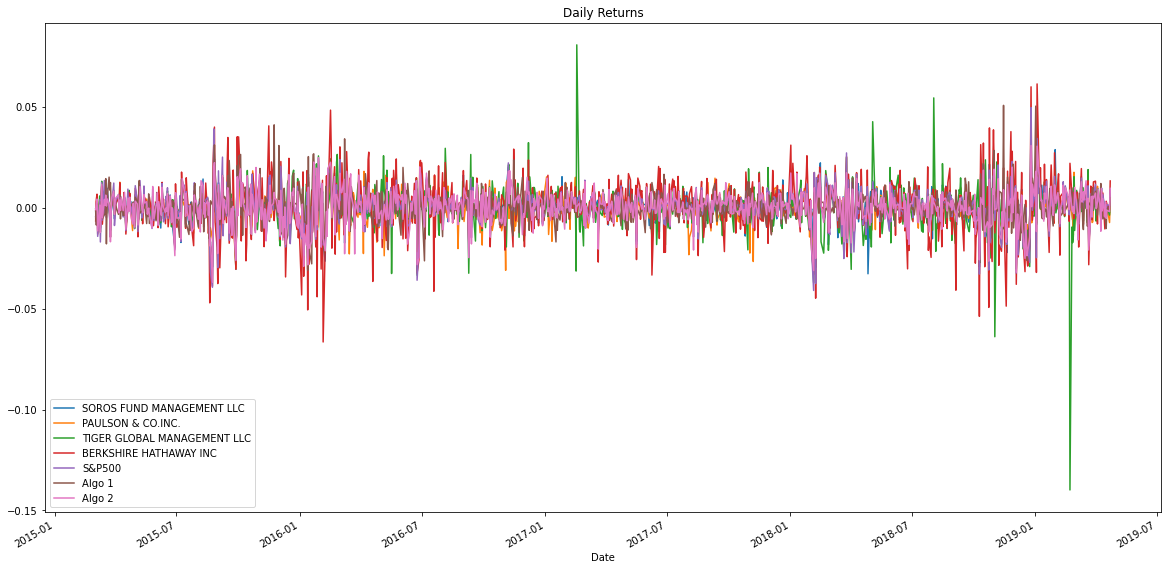

In [214]:
whale_algo_sp500.plot(title = 'Daily Returns', figsize = (20,10) )

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

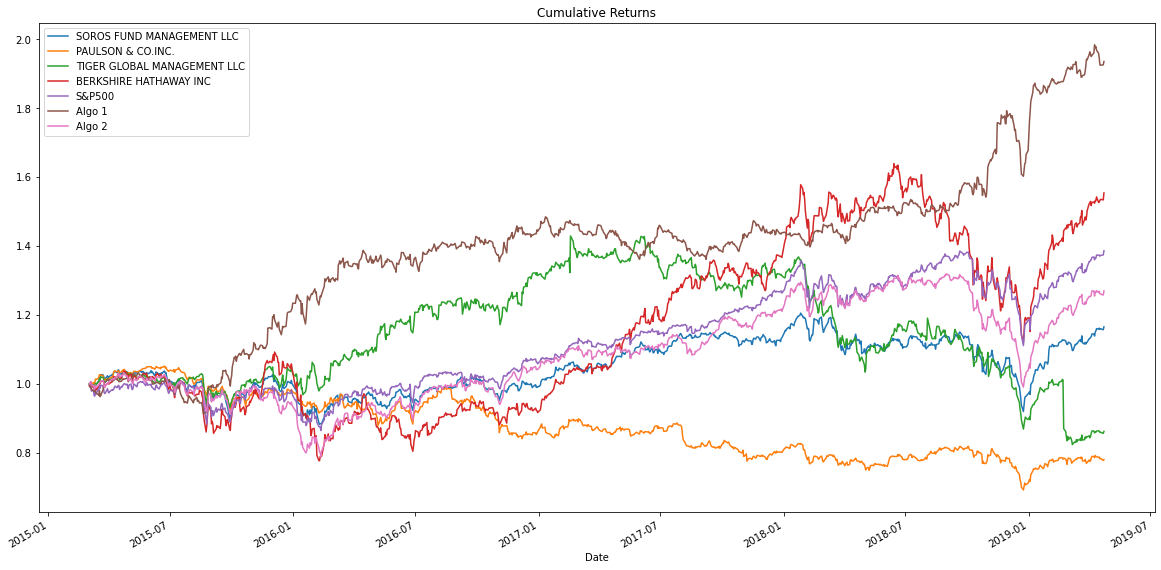

In [225]:
whale_algo_sp500_cumulative_returns = (1 + whale_algo_sp500).cumprod()
whale_algo_sp500_cumulative_returns.plot(title = 'Cumulative Returns', figsize = (20,10) )

<AxesSubplot:title={'center':'Portfolio Risk'}>

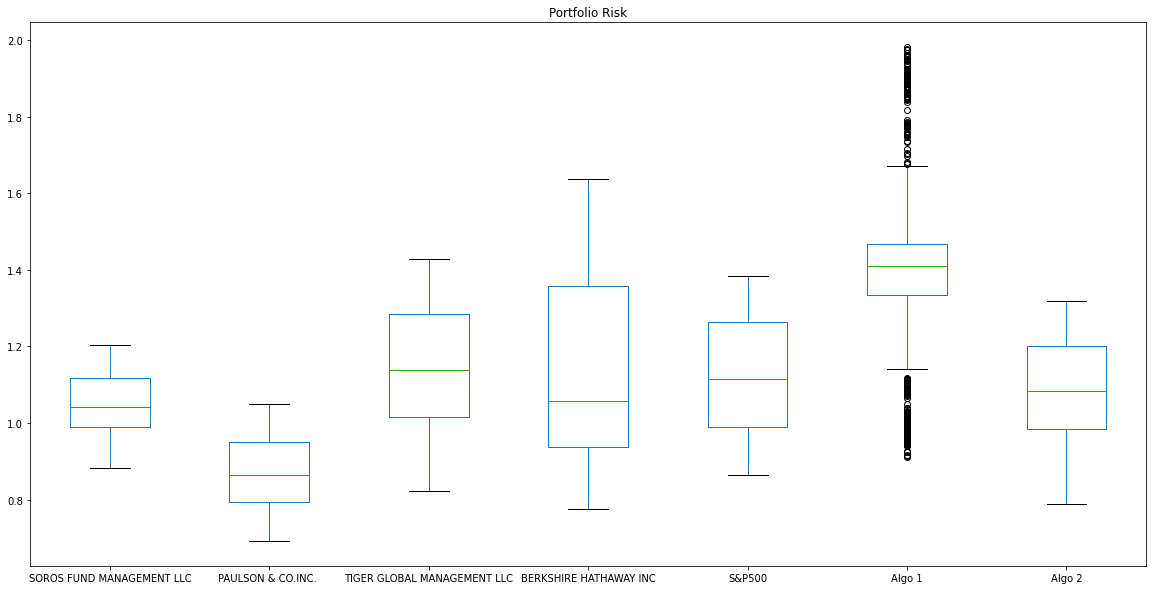

In [236]:
whale_algo_sp500_cumulative_returns.plot.box(title = 'Portfolio Risk', figsize = (20,10))

In [237]:
whale_algo_sp500_std = whale_algo_sp500_cumulative_returns.std()
whale_algo_sp500_std 

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
S&P500                         0.144448
Algo 1                         0.232277
Algo 2                         0.131700
dtype: float64

In [248]:
riskier_than_sp500_df = (whale_algo_sp500_std > whale_algo_sp500_std['S&P500']).sort_values(ascending = False)
riskier_than_sp500_df 

Algo 1                          True
BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Algo 2                         False
S&P500                         False
PAULSON & CO.INC.              False
SOROS FUND MANAGEMENT LLC      False
dtype: bool

In [251]:
annual_std = riskier_than_sp500_df *np.sqrt(252)
annual_std

Algo 1                         15.874508
BERKSHIRE HATHAWAY INC         15.874508
TIGER GLOBAL MANAGEMENT LLC    15.874508
Algo 2                          0.000000
S&P500                          0.000000
PAULSON & CO.INC.               0.000000
SOROS FUND MANAGEMENT LLC       0.000000
dtype: float64